# xaddon example: linear regression
* Wenchang Yang (wenchang@princeton.edu)

In [1]:
import xarray as xr, numpy as np, pandas as pd
import matplotlib.pyplot as plt

import xaddon

In [2]:
%config InlineBackend.figure_format ='retina'
plt.rcParams['figure.dpi'] = 128

## data

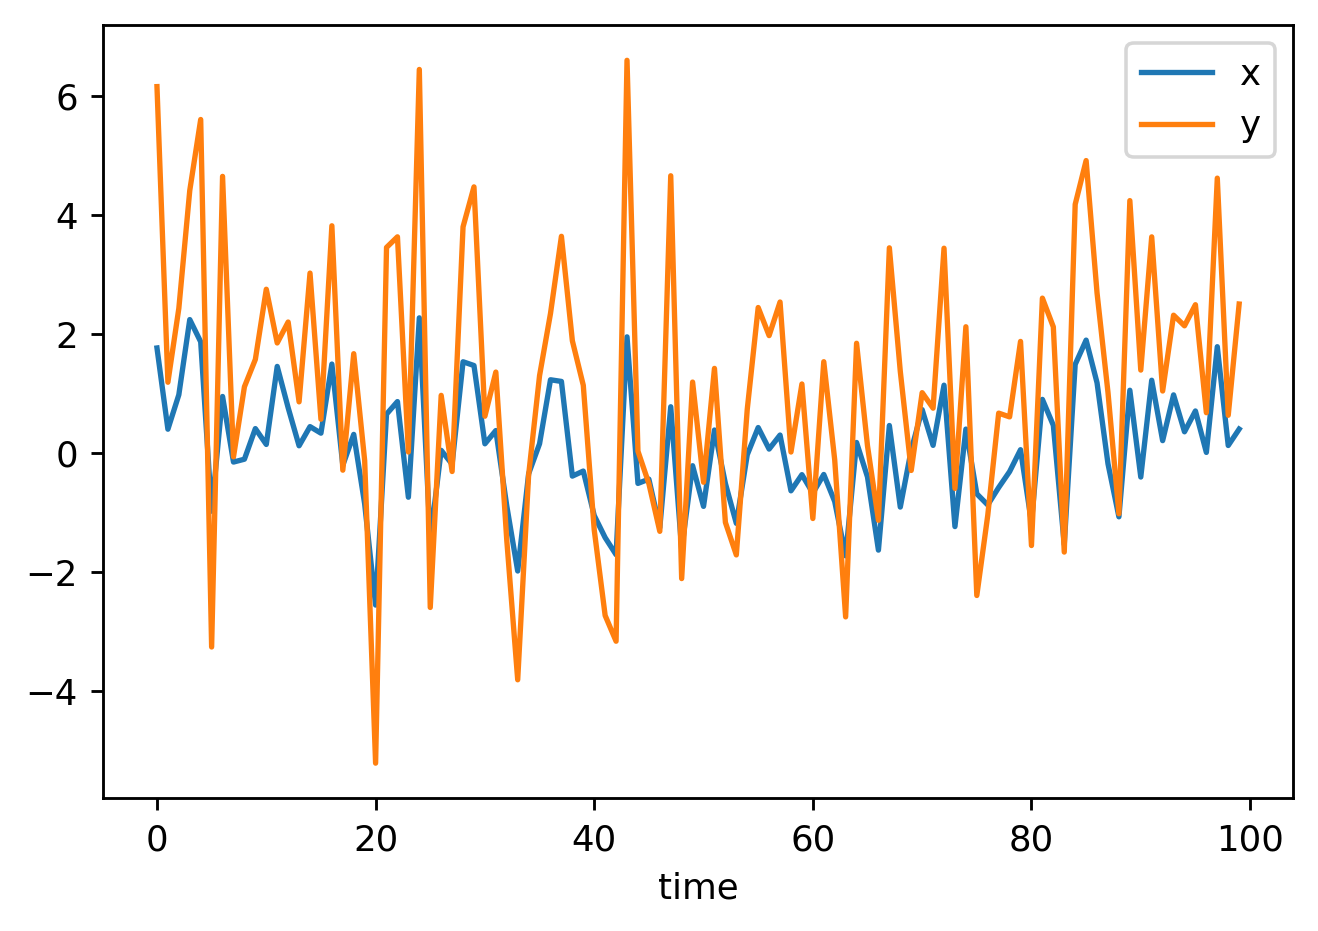

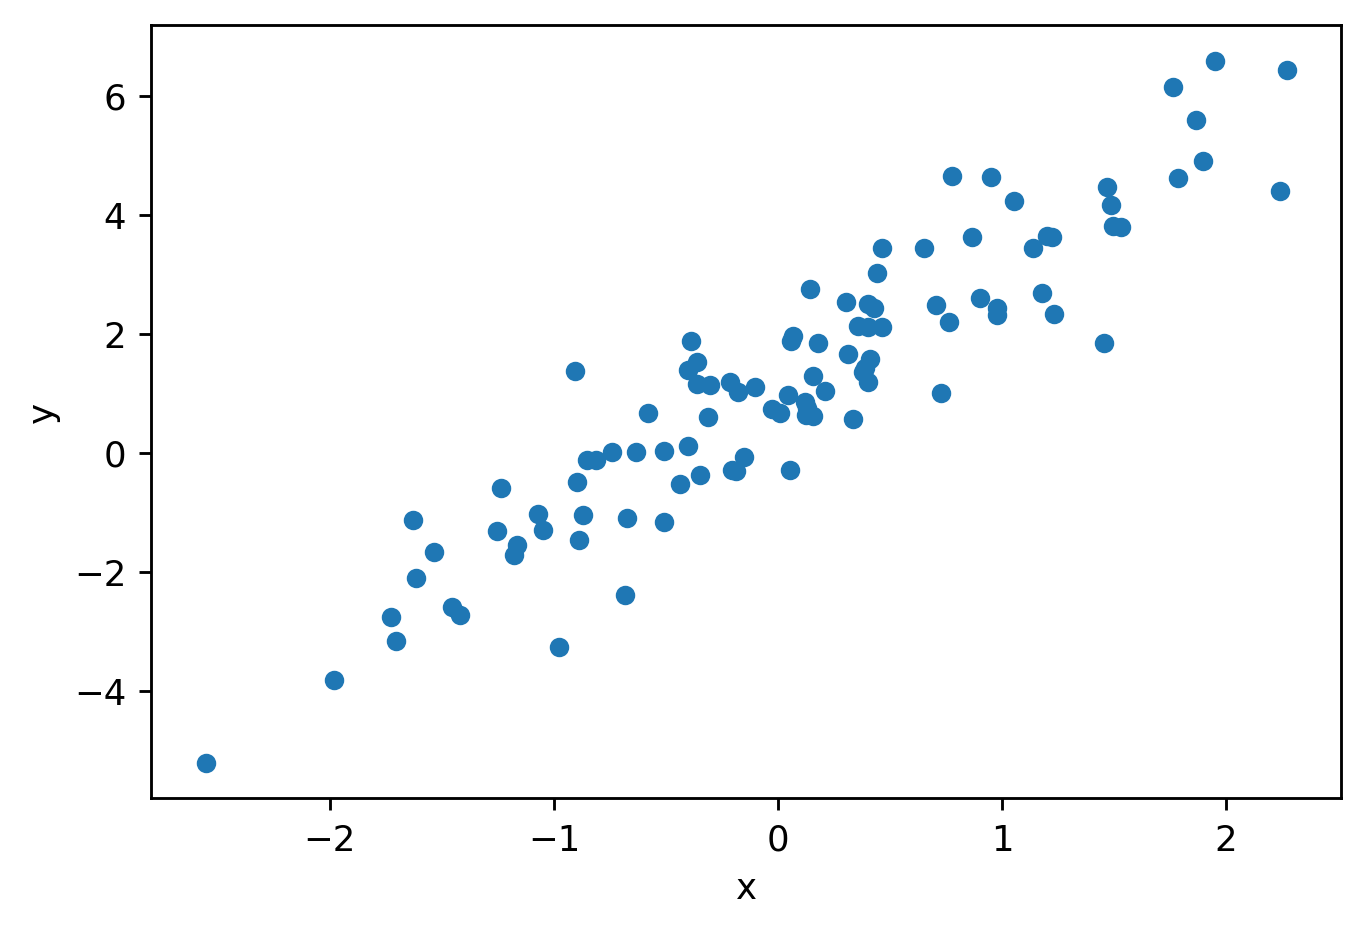

In [3]:
np.random.seed(0)
da_x = xr.DataArray(np.random.randn(100) , dims='time') 
np.random.seed(1)
err = xr.DataArray(np.random.randn(100) , dims='time')

da_y = da_x * 2 + 1 + err
da_x.plot(label='x')
da_y.plot(label='y')
plt.legend()

pd.DataFrame(dict(x=da_x, y=da_y)).plot.scatter('x', 'y')

## linear regression

In [4]:
reg = da_y.linregress.on(da_x, dim='time')
reg

<xarray.Dataset>
Dimensions:    (time: 100)
Dimensions without coordinates: time
Data variables:
    slope      float64 2.131
    intercept  float64 1.053
    r          float64 0.9261
    p          float64 2.867e-43
    stderr     float64 0.08772
    predicted  (time) float64 4.812 1.906 3.139 5.829 ... 4.859 1.323 1.909

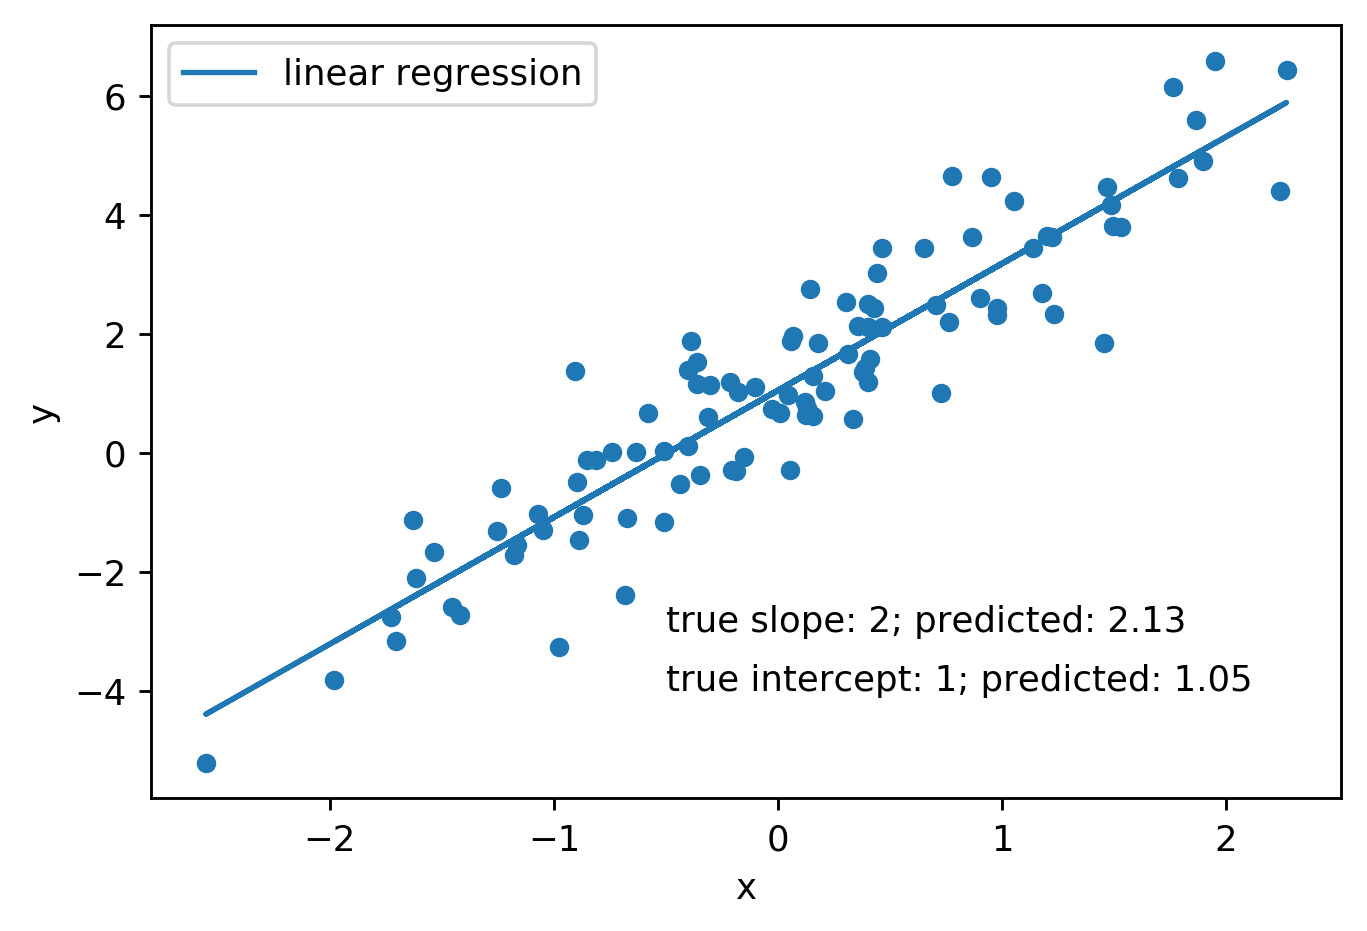

In [5]:
ax = pd.DataFrame(dict(x=da_x, y=da_y)).plot.scatter('x', 'y')
pd.DataFrame(dict(x=da_x, y=reg.predicted)).plot('x', 'y', ax=ax, label='linear regression')

plt.text(-0.5, -3, f'true slope: 2; predicted: {reg.slope.item():.02f}')
plt.text(-0.5, -4, f'true intercept: 1; predicted: {reg.intercept.item():.02f}')

ax.autoscale()